In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [166]:
df= pd.read_csv('data.csv')
df

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [167]:
df.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [168]:
df.tail()

,SAT,GPA
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76
83,2050,3.81


In [169]:
df.shape

(84, 2)

In [170]:
df.dropna(inplace=True)

In [171]:
df.drop_duplicates(inplace= True)

In [172]:
df.isnull().sum()

SAT    0
GPA    0
dtype: int64

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83 entries, 0 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SAT     83 non-null     int64  
 1   GPA     83 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.9 KB


In [174]:
df.describe()

,SAT,GPA
count,83.000000,83.000000
mean,1846.253012,3.334217
std,104.777795,0.270794
min,1634.000000,2.400000
25%,1774.000000,3.195000
50%,1849.000000,3.380000
75%,1934.000000,3.505000
max,2050.000000,3.810000


In [175]:
X = np.array(df.drop(columns= 'GPA'))
Y = np.array(df['GPA'])
X

array([[1714],
       [1664],
       [1760],
       [1685],
       [1693],
       [1670],
       [1764],
       [1792],
       [1850],
       [1735],
       [1775],
       [1735],
       [1712],
       [1773],
       [1872],
       [1755],
       [1674],
       [1842],
       [1786],
       [1761],
       [1722],
       [1663],
       [1687],
       [1974],
       [1826],
       [1787],
       [1821],
       [2020],
       [1794],
       [1769],
       [1934],
       [1775],
       [1855],
       [1880],
       [1849],
       [1808],
       [1954],
       [1777],
       [1831],
       [1865],
       [1850],
       [1966],
       [1702],
       [1990],
       [1925],
       [1824],
       [1956],
       [1857],
       [1979],
       [1802],
       [1855],
       [1907],
       [1634],
       [1879],
       [1887],
       [1730],
       [1953],
       [1781],
       [1891],
       [1964],
       [1808],
       [1893],
       [2041],
       [1893],
       [1832],
       [1850],
       [19

In [176]:
xtrain,xtest,ytrain,ytest = train_test_split(X, Y, test_size=0.2, random_state=2)

In [177]:
sv = SVR(kernel='rbf')

In [178]:
sv.fit(xtrain,ytrain)
y_predict = sv.predict(xtest)
y_predict

array([3.63578947, 3.15263158, 3.27894737, 3.18578947, 3.63578947,
       3.54736842, 3.6831579 , 3.57105263, 3.26789474, 3.40210526,
       3.56315789, 3.53      , 3.25368421, 3.24578947, 3.66894737,
       3.37526316, 3.32631579])

In [181]:
svr = SVR(kernel= 'rbf')
svr.fit(X,Y)

c:\Users\AL-HAMD\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

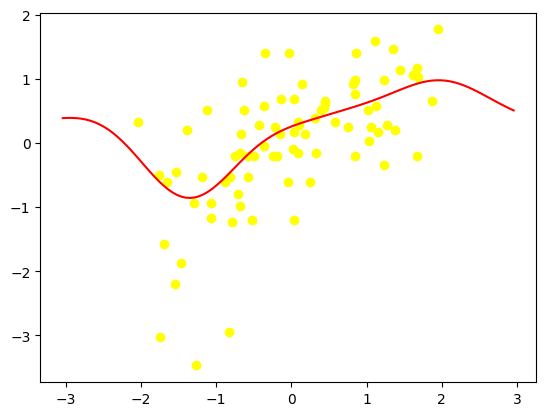

In [222]:

sc_x = StandardScaler()
X = sc_x.fit_transform(X)


sc_y = StandardScaler()
Y = np.array(Y).reshape(-1,1)
Y = sc_y.fit_transform(Y).ravel()


svr = SVR(kernel= 'rbf')
svr.fit(X,Y)

x_min, x_max= X[:,0].min()-1, X[:,0].max()+1
xx = np.linspace(x_min, x_max, 100).reshape(-1,1)

y_pred = svr.predict(xx)

plt.scatter(X[:,0], Y , color='yellow')
plt.plot(xx, y_pred, color='red')